## Korrelationen untersuchen ##

<Axes: >

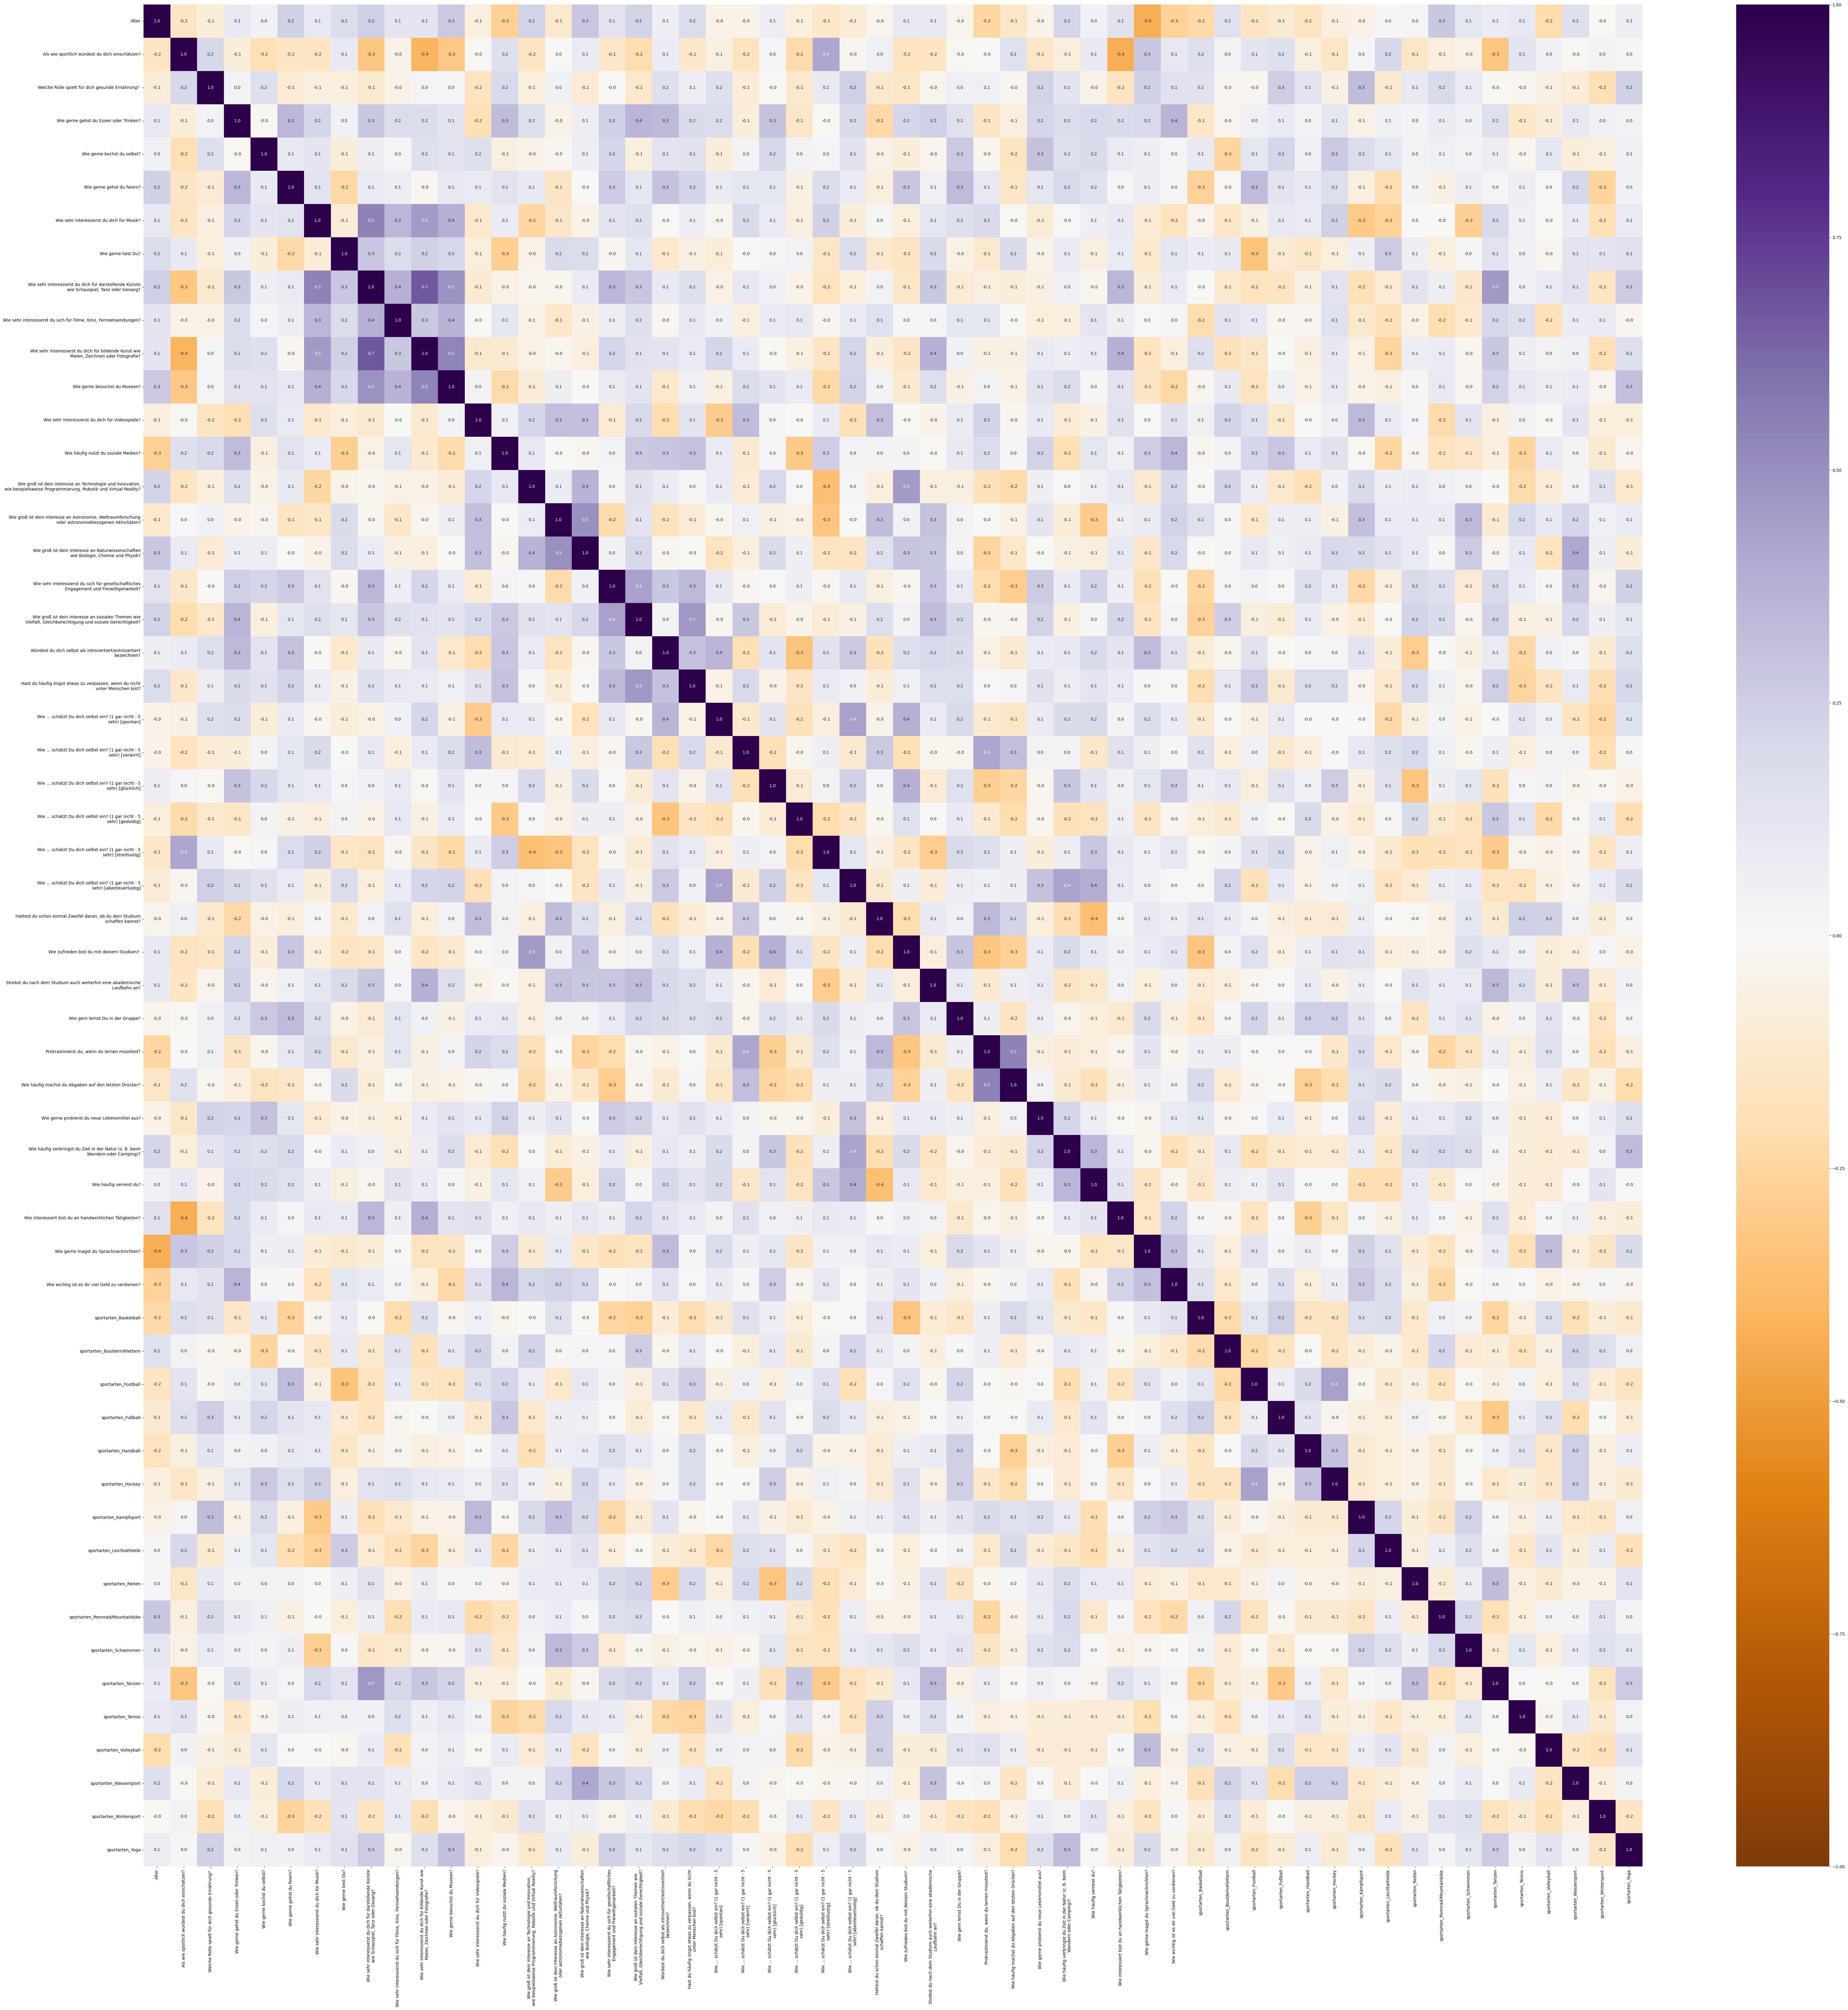

In [ ]:
fig, ax = plt.subplots(figsize=(80, 80))

sb.heatmap(data.corr(numeric_only=True),
           annot=True, cmap="PuOr",fmt=".1f",
           vmin=-1, vmax=1)

## Höchste und niedrigste Korrelationen raussuchen, um das ganze übersichtlicher zu machen:

In [ ]:
correlations = data.corr(numeric_only=True)

# transform the correlation matrix into a dataframe with three columns
# this will create a row for each pair of columns with the correlation value as the third column
# also exclude all duplicate correlations (e.g. correlation between column1 and column2 and column2 and column1)
# based on https://stackoverflow.com/a/51071640
correlation_df = correlations.unstack().drop_duplicates().reset_index()
correlation_df.columns = ["column1", "column2", "correlation"]

# exclude all correlations with 1 as value (probably with the same column)
correlation_df = correlation_df.loc[correlation_df["correlation"] < 1 ]

# sort by correlation value
sorted_correlations = correlation_df.sort_values(by="correlation", ascending=False)
sorted_correlations.columns = ["column1", "column2", "correlation"]

# round the correlation values to one decimal place
sorted_correlations["correlation"] = sorted_correlations["correlation"].apply(lambda x: round(x, 1))

highest_and_lowest_correlations = pd.concat([sorted_correlations.head(15), sorted_correlations.tail(15)])

display(HTML(highest_and_lowest_correlations.to_html()))

## TODO: Hier interessante Korrelationen raussuchen

## TODO: Vielleicht wollen wir die riesige Matrix lieber loswerden?
Die hat kaum Mehrwert, weil hohe Korrelationen hauptsächlich auftreten, wenn eine Person als einzige Reiten und Pho angegeben hat oder so \
Außerdem kann man sie absolut nicht ablesen wegen der Größe

<Axes: >

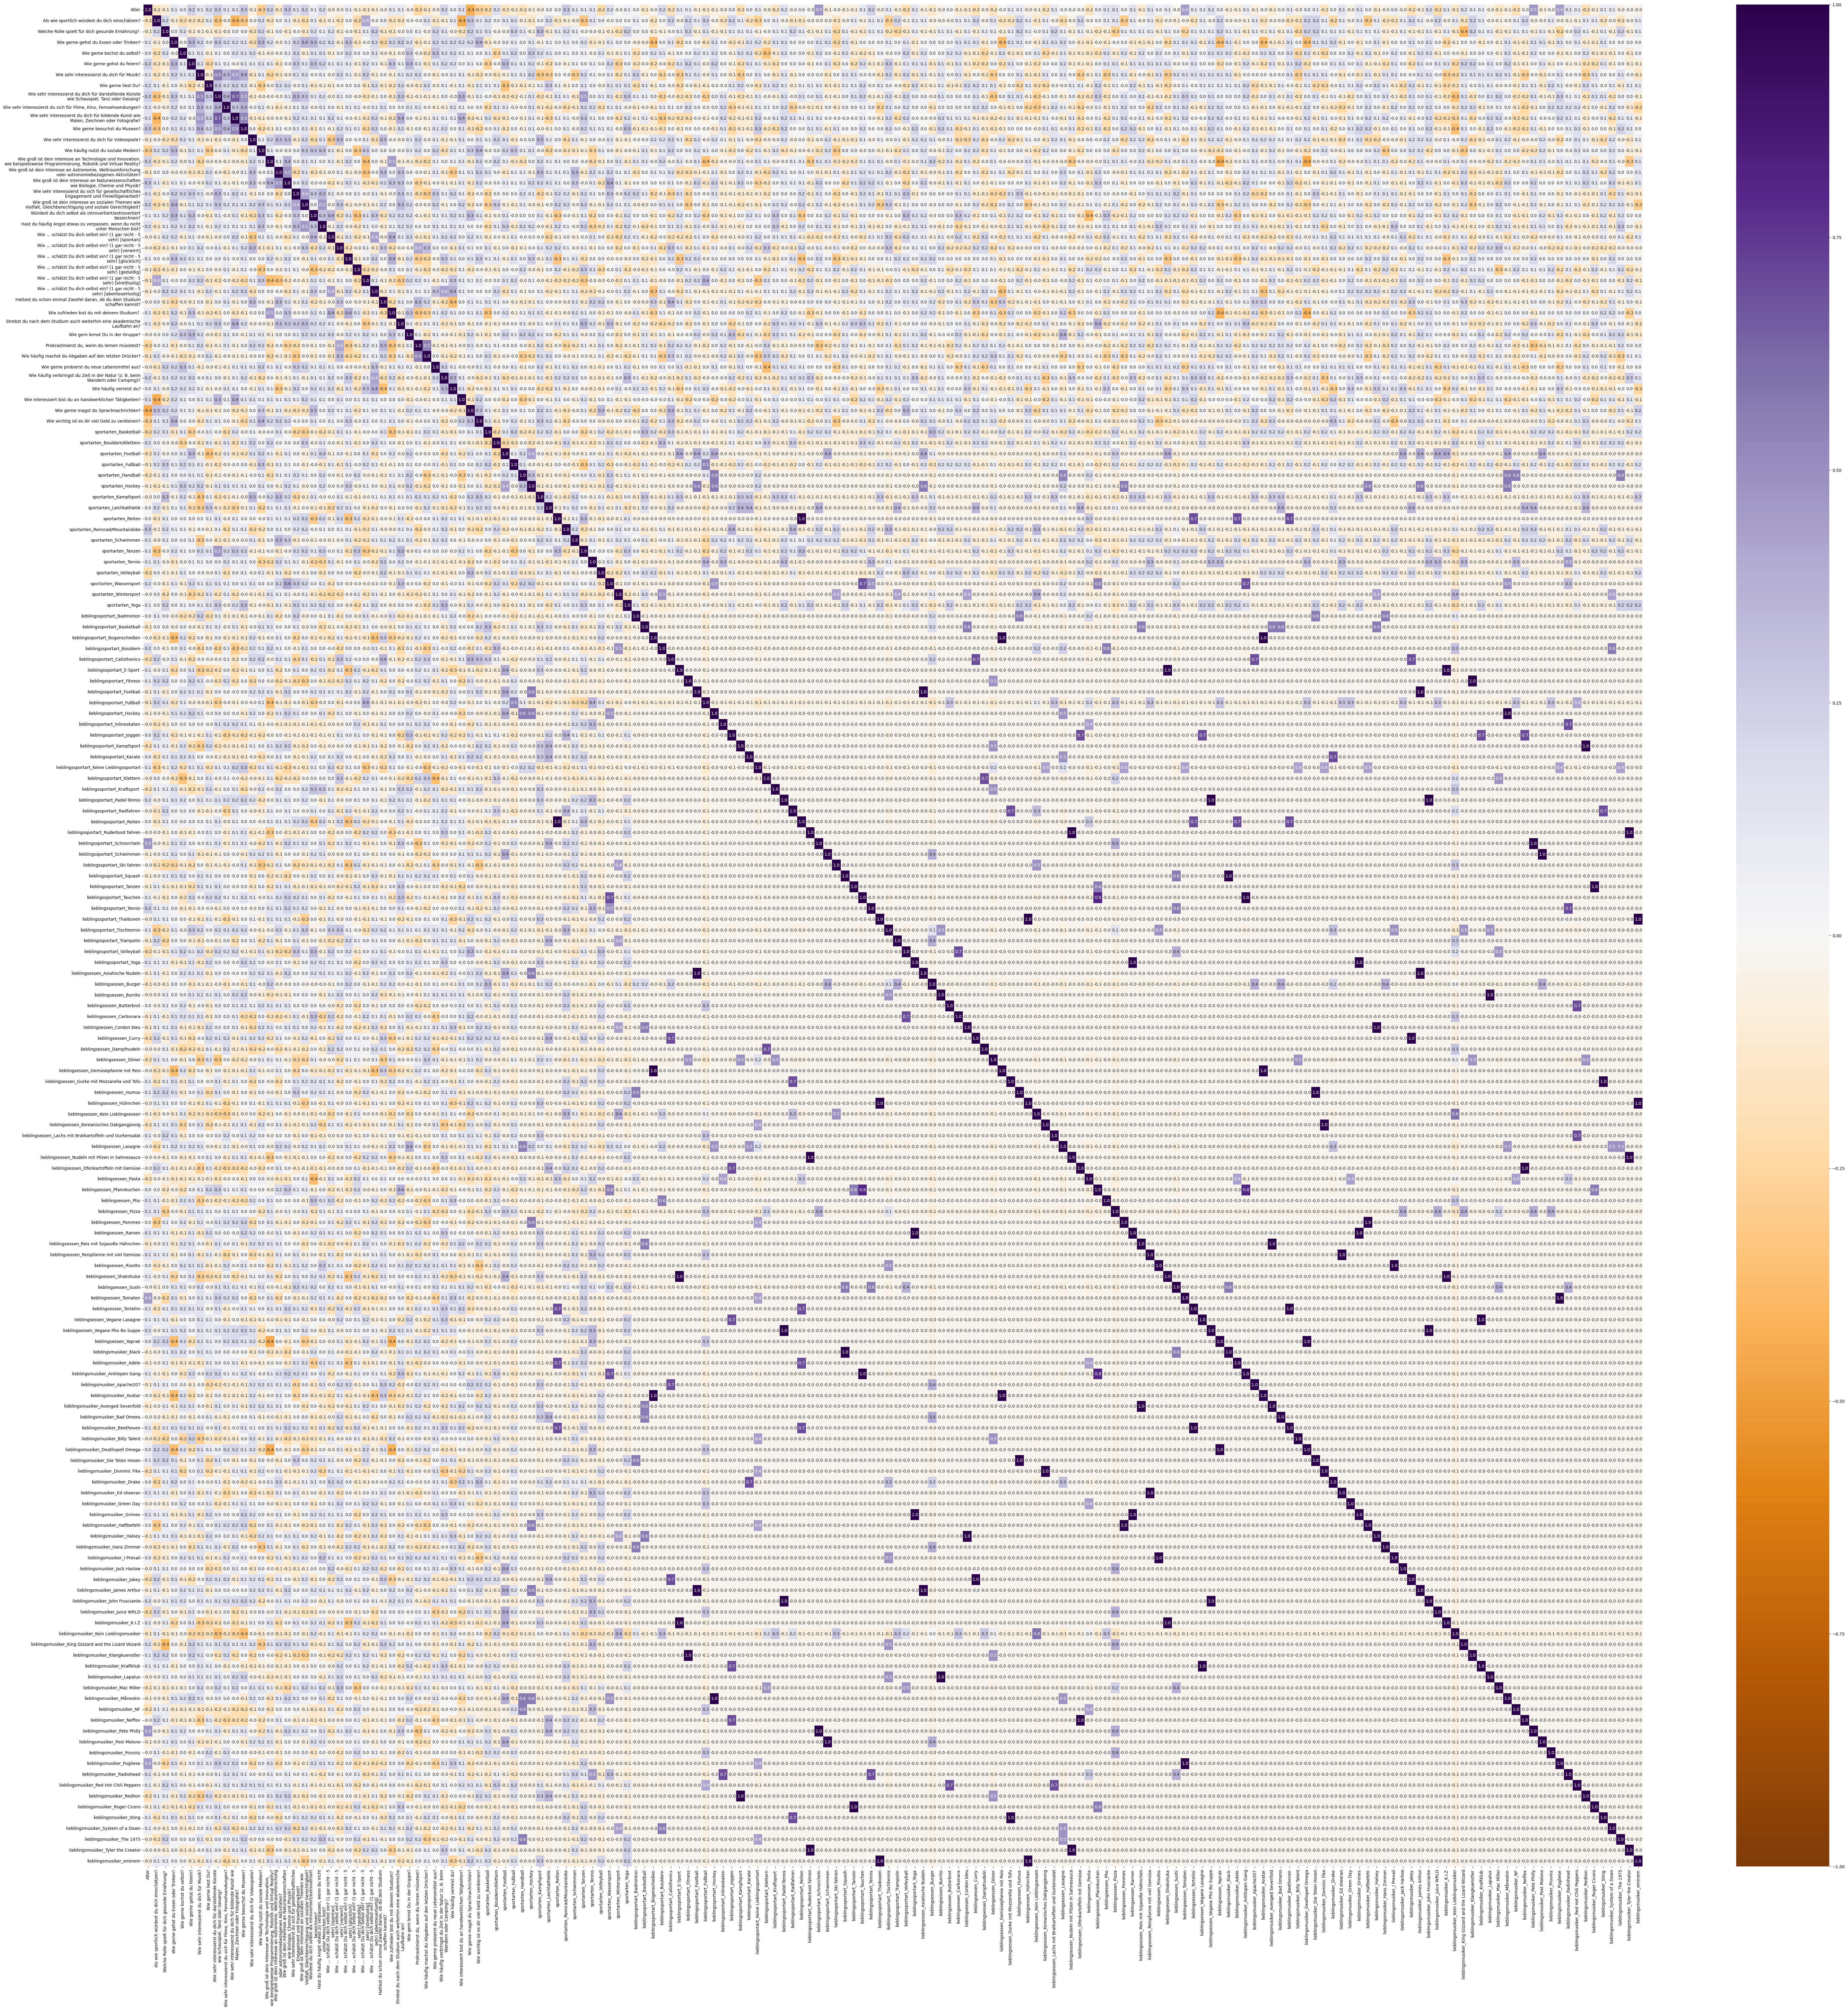

In [ ]:
fig, ax = plt.subplots(figsize=(80, 80))

sb.heatmap(data_encoded.corr(numeric_only=True),
           annot=True, cmap="PuOr",fmt=".1f",
           vmin=-1, vmax=1)

# TODO: Sinnige Pairplots aussuchen statt random #

z. B. welche mit starken Korrelationen

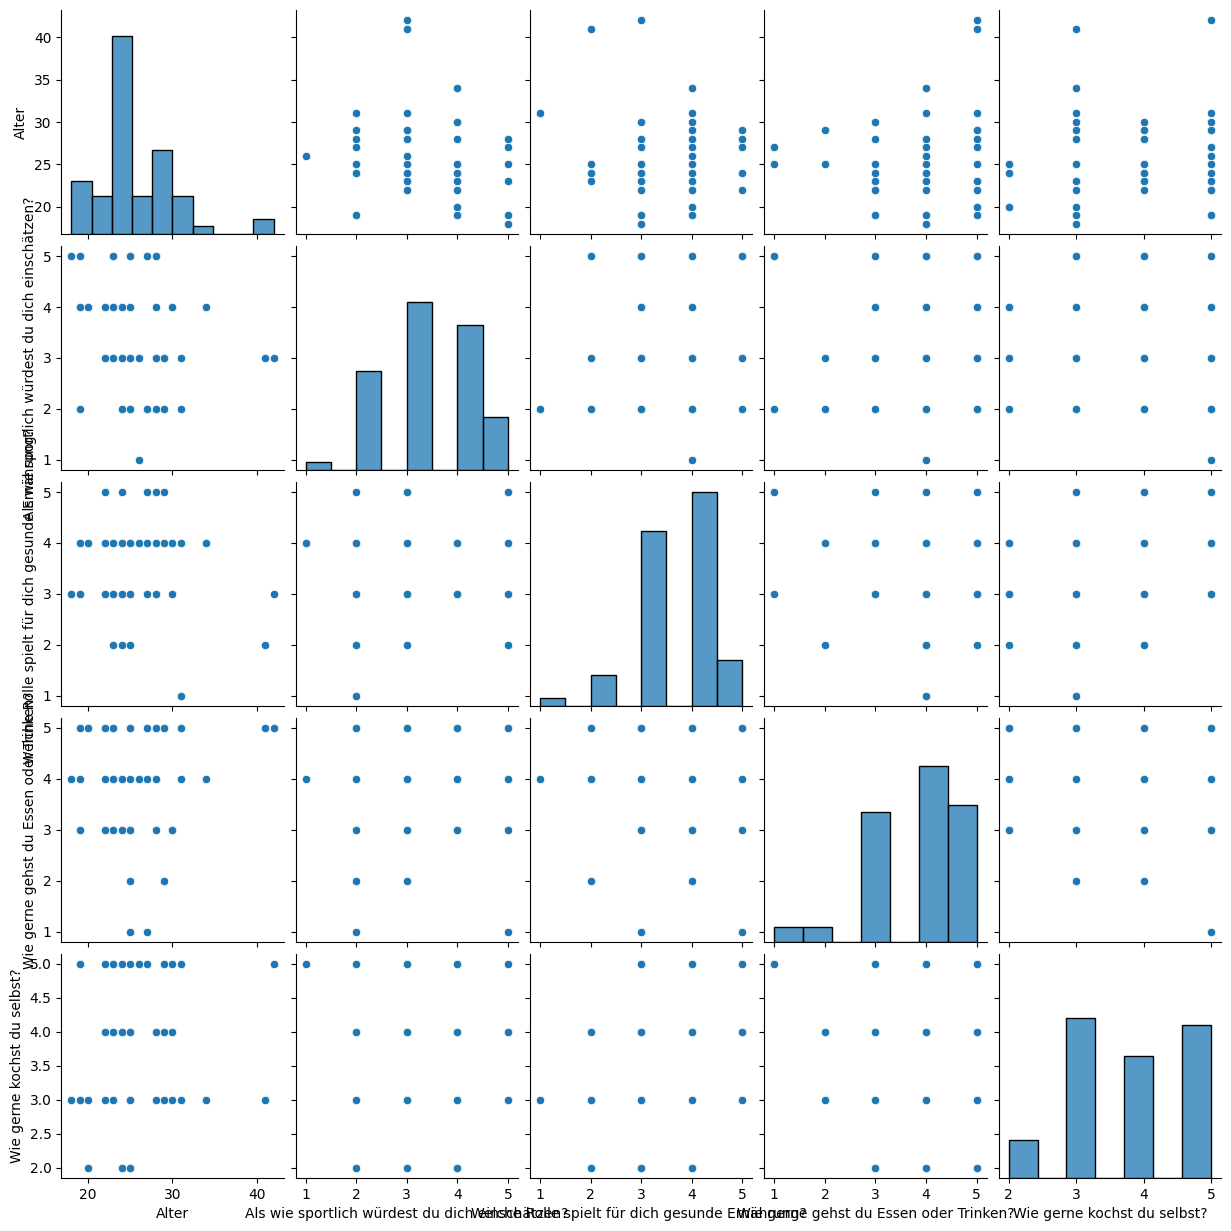

In [ ]:
sb.pairplot(data.iloc[:,:10], diag_kind="hist")

# TODO: Welche Features wollen wir (vielleicht) nicht mit einbeziehen? #

Auf jeden Fall das Pseudonym und den Timestamp!

Z. B. das Alter, das Geschlecht, die Funktion an der HSD, den Studiengang?

In [ ]:
columns_to_drop = [columns.pseudonym]
data = data.drop(columns_to_drop, axis=1)

data

Alter Geschlecht   
0      28   männlich  \
1      26   männlich   
2      24   männlich   
3      23   männlich   
4      24   weiblich   
..    ...        ...   
57     26   männlich   
58     22   männlich   
59     25   weiblich   
60     31   weiblich   
61     25   männlich   

   Welcher Funktion an der HSD fühlst du dich am meisten\nzugehörig?   
0                                          Student*in                 \
1                                          Student*in                  
2                                          Student*in                  
3                                          Student*in                  
4                                          Student*in                  
..                                                ...                  
57                                         Student*in                  
58                                         Student*in                  
59                                         Student*in                  
60                                         Student*in                  
61                                         Student*in                  

   Welchem Studiengang fühlst du dich am meisten zugehörig?   
0                                                 MMI        \
1                                                 MMI         
2                                                 MMI         
3                                                 MMI         
4                                                 MMI         
..                                                ...         
57                                                MMI         
58                                                BMT         
59                                                BMT         
60                                                BMI         
61                                                BMT         

    Als wie sportlich würdest du dich einschätzen?   
0                                                4  \
1                                                3   
2                                                2   
3                                                5   
4                                                3   
..                                             ...   
57                                               1   
58                                               3   
59                                               3   
60                                               3   
61                                               2   

   Was ist deine absolute Lieblingssportart?   
0                                     Joggen  \
1                                    Fußball   
2                    Keine Lieblingssportart   
3                                  Trampolin   
4                                   Klettern   
..                                       ...   
57                   Keine Lieblingssportart   
58                                   Fußball   
59                          Ruderboot fahren   
60                              Padel-Tennis   
61                                Ski fahren   

    Welche Rolle spielt für dich gesunde Ernährung?    
0                                                  4  \
1                                                  4   
2                                                  5   
3                                                  2   
4                                                  4   
..                                               ...   
57                                                 4   
58                                                 3   
59                                                 3   
60                                                 4   
61                                                 2   

    Wie gerne gehst du Essen oder Trinken?  Wie gerne kochst du selbst?   
0                                        3                            4  \
1                                        4  